# setup and get data

1.1 install dependecies and setup

In [1]:
!pip install labelme

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable

#collecting images from opencv

In [5]:
import os 
import time
import uuid 
import cv2

In [6]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [7]:
cap = cv2.VideoCapture(0)

for imgnum in range(number_images):
    print('Collecting Image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [8]:
!labelme

In [9]:
##Import tensorflow and dps

In [10]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [11]:
#Loading image into tensorflow pipline

In [12]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=True)

In [13]:
images.as_numpy_iterator().next()

b'data\\images\\9cce216b-225b-11ee-925e-a9ea5d03fab7.jpg'

In [14]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images=images.map(load_image)

In [16]:
images.as_numpy_iterator().next()

array([[[109, 134, 138],
        [111, 136, 140],
        [113, 139, 140],
        ...,
        [ 91, 108, 115],
        [ 93, 110, 118],
        [ 93, 110, 118]],

       [[108, 133, 137],
        [110, 135, 139],
        [112, 138, 139],
        ...,
        [ 90, 109, 115],
        [ 92, 109, 117],
        [ 90, 109, 116]],

       [[109, 134, 138],
        [110, 135, 139],
        [111, 137, 138],
        ...,
        [ 91, 112, 117],
        [ 91, 110, 116],
        [ 88, 109, 114]],

       ...,

       [[ 61,  71,  80],
        [ 62,  72,  81],
        [ 61,  74,  82],
        ...,
        [ 58,  67,  64],
        [ 56,  65,  64],
        [ 55,  64,  63]],

       [[ 59,  72,  80],
        [ 59,  74,  81],
        [ 61,  76,  81],
        ...,
        [ 61,  67,  67],
        [ 60,  66,  66],
        [ 61,  67,  67]],

       [[ 59,  74,  81],
        [ 60,  75,  82],
        [ 60,  78,  82],
        ...,
        [ 60,  66,  66],
        [ 60,  66,  66],
        [ 61,  67,  67]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [18]:
image_generator=images.batch(4).as_numpy_iterator()

In [19]:
plot_images=image_generator.next()

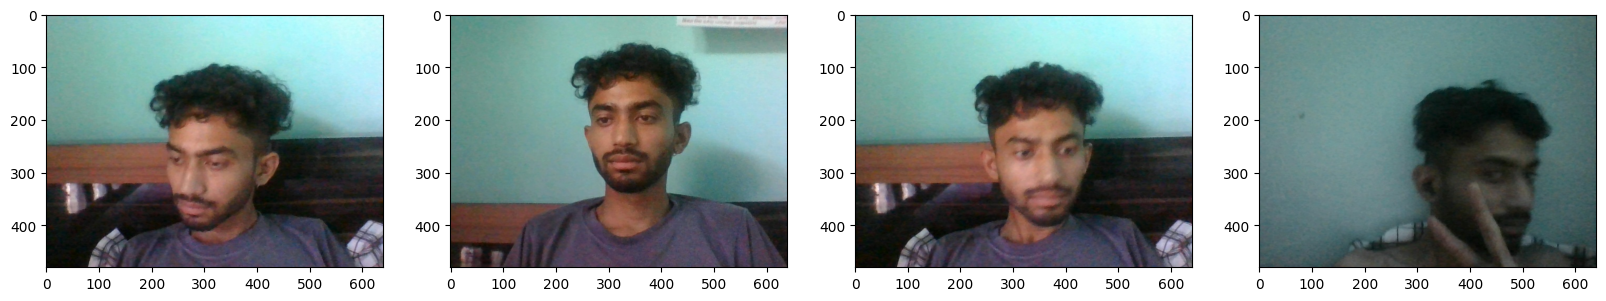

In [20]:
fig ,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [21]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        
        filename =file.split('.')[0]+'.json'
        existing_filepath=os.path.join('data','labels',filename)
        
        if os.path.exists(existing_filepath):
            new_filepath=os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [22]:
import albumentations as alb

In [23]:
augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                       alb.HorizontalFlip(p=0.5),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.RGBShift(p=0.2),
                       alb.VerticalFlip(p=0.5)],
                      bbox_params=alb.BboxParams(format='albumentations',
                                                 label_fields=['class_labels']))

In [24]:
img=cv2.imread(os.path.join('data','train','images','b8d64427-1eda-11ee-a473-cdbdf3789f2b.jpg'))

In [25]:
img

array([[[144, 152, 115],
        [147, 155, 118],
        [151, 156, 117],
        ...,
        [190, 172, 195],
        [201, 182, 207],
        [199, 180, 207]],

       [[146, 154, 114],
        [147, 155, 115],
        [150, 155, 116],
        ...,
        [180, 163, 184],
        [191, 172, 197],
        [187, 168, 193]],

       [[147, 153, 112],
        [147, 154, 111],
        [146, 153, 110],
        ...,
        [197, 181, 199],
        [207, 190, 211],
        [203, 185, 208]],

       ...,

       [[ 24,  26,  36],
        [ 24,  26,  36],
        [ 25,  27,  37],
        ...,
        [ 71,  64,  67],
        [ 70,  64,  69],
        [ 66,  62,  67]],

       [[ 21,  25,  36],
        [ 22,  26,  37],
        [ 26,  28,  39],
        ...,
        [ 69,  62,  67],
        [ 68,  61,  68],
        [ 65,  61,  67]],

       [[ 18,  24,  37],
        [ 19,  25,  38],
        [ 25,  26,  40],
        ...,
        [ 66,  59,  64],
        [ 66,  59,  66],
        [ 65,  61,  67]]

In [26]:
with open(os.path.join('data','train','labels','b8d64427-1eda-11ee-a473-cdbdf3789f2b.json'),'r') as f:
    label=json.load(f)

In [27]:
label['shapes'][0]['points']

[[246.9230769230769, 47.17948717948718],
 [474.1025641025641, 337.43589743589746]]

In [28]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [29]:
coords

[246.9230769230769, 47.17948717948718, 474.1025641025641, 337.43589743589746]

In [30]:
coords=list(np.divide(coords,[640,480,640,480]))

In [31]:
coords

[0.38581730769230765,
 0.0982905982905983,
 0.7407852564102564,
 0.702991452991453]

In [32]:
augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])

In [33]:
augmented

{'image': array([[[183, 169, 131],
         [184, 170, 131],
         [183, 173, 131],
         ...,
         [230, 201, 224],
         [231, 202, 225],
         [222, 193, 216]],
 
        [[183, 169, 131],
         [183, 169, 130],
         [183, 170, 129],
         ...,
         [232, 205, 223],
         [232, 205, 223],
         [235, 208, 226]],
 
        [[184, 168, 129],
         [181, 168, 127],
         [181, 169, 125],
         ...,
         [242, 215, 232],
         [243, 217, 231],
         [249, 223, 237]],
 
        ...,
 
        [[ 63,  30,  48],
         [ 66,  33,  51],
         [ 70,  37,  55],
         ...,
         [111,  66,  80],
         [112,  65,  79],
         [114,  64,  79]],
 
        [[ 63,  30,  48],
         [ 67,  34,  52],
         [ 70,  37,  55],
         ...,
         [113,  67,  84],
         [112,  64,  80],
         [114,  61,  78]],
 
        [[ 61,  28,  46],
         [ 61,  31,  48],
         [ 68,  38,  55],
         ...,
         [113,  66,

In [34]:
augmented['image'].shape
augmented['bboxes']

[(0.24871794871794867,
  0.0892877492877493,
  0.7535612535612535,
  0.7343019943019944)]

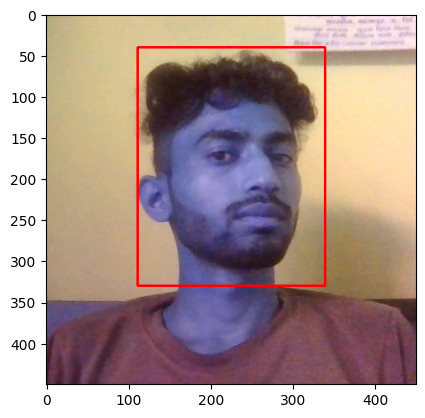

In [35]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
                   (255,0,0),2)
plt.imshow(augmented['image'])

In [36]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data',partition,'images')):
        img = cv2.imread(os.path.join('data',partition,'images',image))
        
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data',partition,'labels', f'{image.split(".")[0]}.json')
        
        if os.path.exists(label_path):
            with open(label_path,'r') as f:
                label = json.load(f)
            
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))
        
        try:
            for x in range(60):
                augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data',partition,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])
                
                annotation={}
                annotation['image']=image
                
                if os.path.exists(label_path):
                    if len(augmented['bboxes'])==0:
                        annotaion['bbox']=[0,0,0,0]
                        annotation['class']=0
                    else:
                        annotation['bbox']=augmented['bboxes'][0]
                        annotation['class']=1
                else:
                    annotation['bbox']=[0,0,0,0]
                    annotation['class']=0
                    
                    
                with open(os.path.join('aug_data',partition,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
                       json.dump(annotation,f)
                        
        except Exception as e:
                print(e)

In [37]:
train_images=tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [38]:
test_images=tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x:x/255)

In [39]:
val_images=tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x:tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x:x/255)

In [40]:
def load_labels(label_path):
    with open(label_path.numpy(),'r' ,encoding='utf-8') as f:
        label =json.load(f)
    return [label['class']],label['bbox']

In [41]:
train_labels=tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json',shuffle=False)
train_labels=train_labels.map(lambda x: tf.py_function(load_labels ,[x],[tf.uint8,tf.float16]))

In [42]:
test_labels=tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json',shuffle=False)
test_labels=test_labels.map(lambda x: tf.py_function(load_labels ,[x],[tf.uint8,tf.float16]))

In [43]:
val_labels=tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json',shuffle=False)
val_labels=val_labels.map(lambda x: tf.py_function(load_labels ,[x],[tf.uint8,tf.float16]))

In [44]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [45]:
len(train_images),len(train_labels),len(test_images),len(test_labels),len(val_images),len(val_labels)

(3780, 3780, 840, 840, 720, 720)

In [46]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)

In [47]:
test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(3000)
test=test.batch(8)
test=test.prefetch(4)

In [48]:
val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(1000)
val=val.batch(8)
val=val.prefetch(4)

In [49]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [50]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.0681, 0.1843, 0.672 , 0.9614],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.2303, 0.391 , 0.927 ],
        [0.2952, 0.1952, 0.882 , 0.895 ],
        [0.2334, 0.27  , 0.8613, 0.998 ],
        [0.2197, 0.259 , 0.7246, 0.904 ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [51]:
data_samples=train.as_numpy_iterator()

In [52]:
res=data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


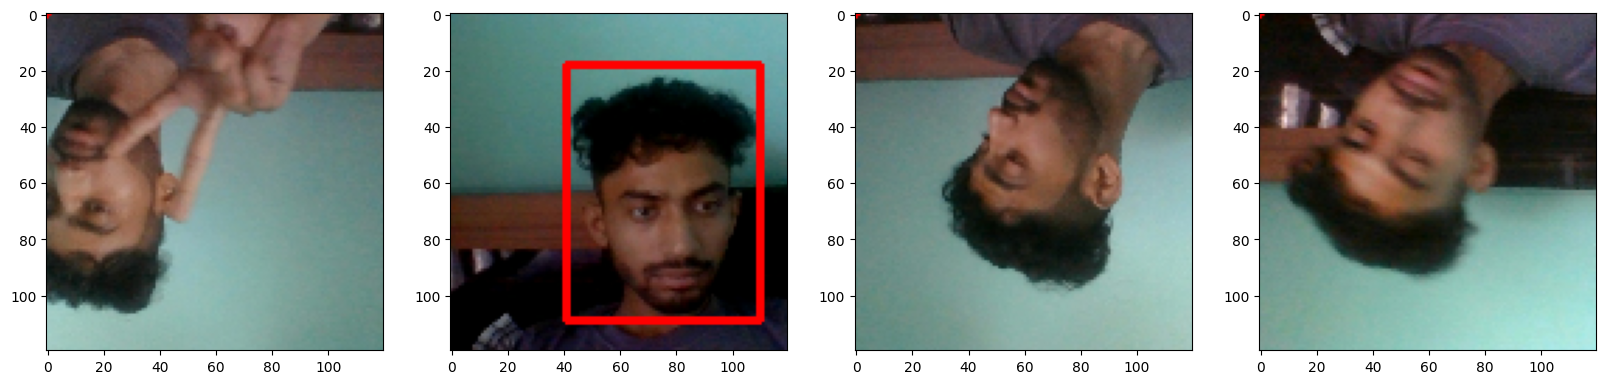

In [53]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_image=res[0][idx]
    sample_coords=res[1][1][idx]
    
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                        (255,0,0),2)
    ax[idx].imshow(sample_image)

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D ,MaxPooling2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [55]:
vgg =VGG16(include_top=False)

In [56]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [57]:
def build_model():
    input_layer=Input(shape=(120,120,3))
    
    vgg=VGG16(include_top=False)(input_layer)
    
    #classification
    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048,activation='relu')(f1)
    class2=Dense(1,activation='sigmoid')(class1)
    
    #Bounding Box Model
    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048,activation='relu')(f2)
    regress2=Dense(4,activation='sigmoid')(regress1)
    
    facetracker=Model(inputs=input_layer,outputs=[class2,regress2])
    return facetracker

In [ ]:
train.as_numpy_iterator().next()[1]

In [59]:
facetracker=build_model()

In [60]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [61]:
X,y=train.as_numpy_iterator().next()

In [62]:
X.shape

(8, 120, 120, 3)

In [63]:
classes, corrds=facetracker.predict(X)

1/1 [==============================] - 2s 2s/step


In [64]:
classes ,coords

(array([[0.30575517],
        [0.31178632],
        [0.37965906],
        [0.40215755],
        [0.2837384 ],
        [0.37517375],
        [0.3880044 ],
        [0.3942725 ]], dtype=float32),
 [0, 0, 1e-05, 1e-05])

In [65]:
batches_per_epoch = len(train)
lr_decay = (1 / 0.75 - 1) / batches_per_epoch


In [66]:
lr_decay

0.0007047216349541929

In [67]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [68]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size 

In [69]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [70]:
classloss(y[0],classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7700447>

In [71]:
class FaceTracker(Model):
    def __init__(self,eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model =eyetracker
        
    def compile(self,opt,classloss ,localizationloss ,**kwargs):
        super().compile(**kwargs)
        self.closs=classloss
        self.lloss=localizationloss
        self.opt=opt
        
    def train_step(self,batch, **kwargs):
        
        X,y =batch
        
        with tf.GradientTape() as tape:
            
            classes,coords=self.model(X,training=True)
        
            batch_classloss=self.closs(y[0],classes)
            batch_localizationloss=self.lloss(tf.cast(y[1],tf.float32),coords)
                                          
            total_loss=batch_localizationloss+0.5*batch_classloss
                                          
            grad= tape.gradient(total_loss,self.model.trainable_variables)
        opt.apply_gradients(zip(grad,self.model.trainable_variables))
        return {"total_loss ":total_loss ,"class_loss ":batch_classloss,"regress_loss ":batch_localizationloss}
    
    def test_step(self,batch, **kwargs):
        
        X,y =batch
        
            
        classes,coords=self.model(X,training=True)
        
        batch_classloss=self.closs(y[0],classes)
        batch_localizationloss=self.lloss(tf.cast(y[1],tf.float32),coords)
                                          
        total_loss=batch_localizationloss+0.5*batch_classloss
                                          
    
        return {"total_loss ":total_loss ,"class_loss ":batch_classloss,"regress_loss ":batch_localizationloss}
    def call(self,X, **kwargs):
        return self.model(X, **kwargs)

In [72]:
model =FaceTracker(facetracker)

In [73]:
model.compile(opt,classloss,regressloss)

In [74]:
logdir='logs'

In [75]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir =logdir)

In [76]:
hist =model.fit(train.take(100) ,epochs=10,validation_data=val,
                callbacks=[tensorboard_callback])

Epoch 1/10
100/100 [==============================] - 562s 5s/step - total_loss : 1.7537 - class_loss : 0.4911 - regress_loss : 1.5081 - val_total_loss : 5.2531 - val_class_loss : 1.7976 - val_regress_loss : 4.3543
Epoch 2/10
100/100 [==============================] - 632s 6s/step - total_loss : 1.1805 - class_loss : 0.3832 - regress_loss : 0.9889 - val_total_loss : 5.3543 - val_class_loss : 1.7475 - val_regress_loss : 4.4806
Epoch 3/10
100/100 [==============================] - 530s 5s/step - total_loss : 0.5134 - class_loss : 0.1743 - regress_loss : 0.4262 - val_total_loss : 3.8127 - val_class_loss : 1.6515 - val_regress_loss : 2.9870
Epoch 4/10
100/100 [==============================] - 405s 4s/step - total_loss : 0.4804 - class_loss : 0.1722 - regress_loss : 0.3943 - val_total_loss : 3.6012 - val_class_loss : 1.3626 - val_regress_loss : 2.9199
Epoch 5/10
100/100 [==============================] - 410s 4s/step - total_loss : 0.5865 - class_loss : 0.1991 - regress_loss : 0.4870 - val

In [77]:
hist.history

{'total_loss ': [3.031623601913452,
  0.6835522055625916,
  0.06595709919929504,
  0.4615700840950012,
  0.2742118239402771,
  0.03556610643863678,
  0.16957996785640717,
  0.059656865894794464,
  0.1088007241487503,
  0.056501805782318115],
 'class_loss ': [0.9366117715835571,
  0.20026150345802307,
  0.02918895334005356,
  0.14810119569301605,
  0.08342546224594116,
  0.009366920217871666,
  0.0595926009118557,
  0.012723995372653008,
  0.05558869242668152,
  0.014626017771661282],
 'regress_loss ': [2.5633177757263184,
  0.5834214687347412,
  0.051362618803977966,
  0.3875194787979126,
  0.2324991077184677,
  0.030882645398378372,
  0.13978366553783417,
  0.053294867277145386,
  0.08100637793540955,
  0.04918879643082619],
 'val_total_loss ': [5.253087043762207,
  5.354287147521973,
  3.8127238750457764,
  3.6012206077575684,
  1.3823826313018799,
  6.346919059753418,
  3.679565906524658,
  5.351678371429443,
  4.346319675445557,
  6.0237274169921875],
 'val_class_loss ': [1.7975904

In [78]:
hist.history.keys()

dict_keys(['total_loss ', 'class_loss ', 'regress_loss ', 'val_total_loss ', 'val_class_loss ', 'val_regress_loss '])

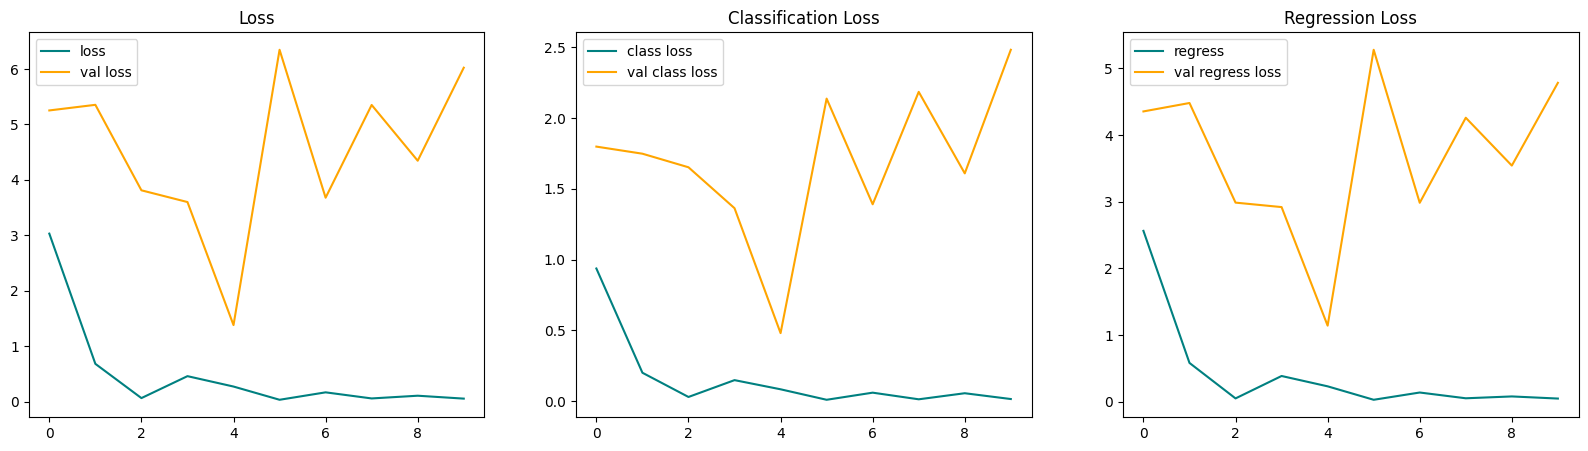

In [79]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

ax[0].plot(hist.history['total_loss '], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss '], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss '], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss '], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss '], color='teal', label='regress')
ax[2].plot(hist.history['val_regress_loss '], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()


In [80]:
test_data=test.as_numpy_iterator()

In [81]:
test_sample=test_data.next()

In [82]:
yhat =facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 993ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


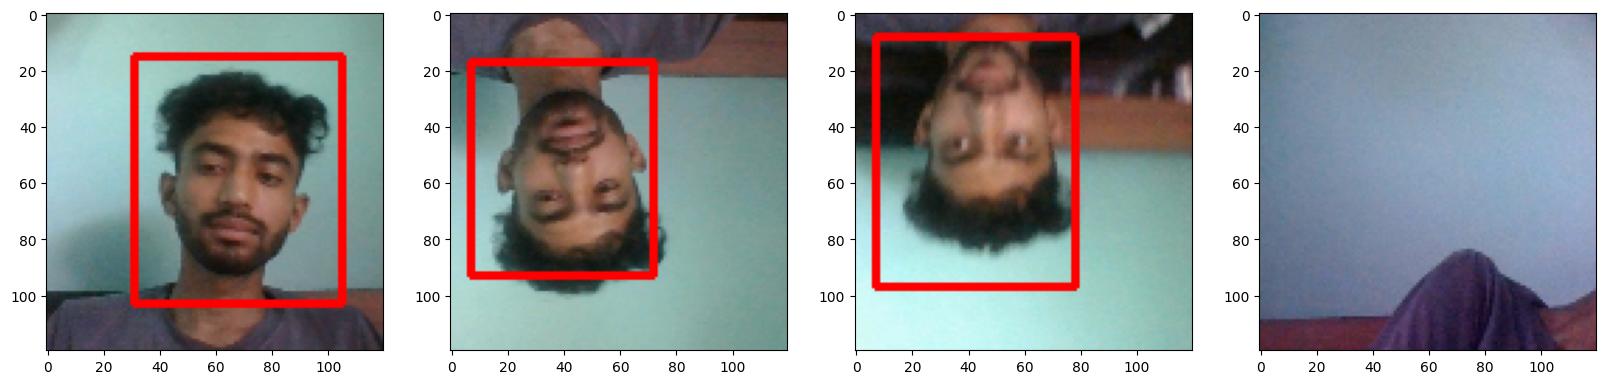

In [83]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample_image=test_sample[0][idx]
    sample_coords=yhat[1][idx]
    
    if yhat[0][idx]>0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                           (255,0,0),2)
    ax[idx].imshow(sample_image)

In [84]:
##save the model

In [85]:
from tensorflow.keras.models import load_model

In [86]:
facetracker.save('facetracker.h5')

In [87]:
facetracker=load_model('facetracker.h5')

In [88]:
###real time detection

# cap =cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame=frame[50:500 ,50:500,:]
    
    rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    resized=tf.image.resize(rgb,(120,120))
    Qq
    yhat=facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords=yhat[1][0]
    
    if yhat[0]>0.5:
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2],[450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:],[450,450]).astype(int)),
                           (255,0,0),2)
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int),[0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int),[80,0])),
                           (255,0,0),-1)
        cv2.putText(frame,'face',tuple(np.add(np.multiply(sample_coords[:2],[450,450]).astype(int),
                                              [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
                
    cv2.imshow('EyeTrack',frame)
    if cv2.waitkey(1) & 0xFF == ord('q'):
            break
                             
cap.release()
cv2.destoryAllWindows()